# Pulse Data Instructions

The raw data is in JSON format, each row contains the pulse data of a device on a specific date.    

The following is the header of the [raw pulse data](../data/processed/pulse_data_for_evaluation.csv):

```csv
device_id_encoded,date,data
D119,240101,"{""Type"":""MeterReportPulseInfo"",""data"":[{""t"":""00:18"",""d"":""1|""},{""t"":""00:30"",""d"":""1|""},{""t"":""00:42"",""d"":""1|""},{""t"":""00:54"",""d"":""1|""},{""t"":""01:05"",""d"":""1|""},{""t"":""01:17"",""d"":""1|""},{""t"":""01:27"",""d"":""1|""},{""t"":""01:39"",""d"":""1|""},{""t"":""01:51"",""d"":""1|""},{""t"":""02:01"",""d"":""1|""},{""t"":""02:13"",""d"":""1|""},{""t"":""02:24"",""d"":""1|""},{""t"":""02:35"",""d"":""1|""},{""t"":""02:46"",""d"":""1|""},{""t"":""02:57"",""d"":""1|""},{""t"":""03:08"",""d"":""1|""},{""t"":""03:20"",""d"":""1|""},{""t"":""03:31"",""d"":""1|""},{""t"":""03:42"",""d"":""1|""},{""t"":""03:53"",""d"":""1|""},{""t"":""04:04"",""d"":""1|""},{""t"":""04:15"",""d"":""1|""},{""t"":""04:27"",""d"":""1|""},{""t"":""04:38"",""d"":""1|""},{""t"":""04:50"",""d"":""1|""},{""t"":""05:01"",""d"":""1|""},{""t"":""05:12"",""d"":""1|""},{""t"":""05:23"",""d"":""1|""},{""t"":""05:36"",""d"":""1|""},{""t"":""09:07"",""d"":""1|0|1|1|0|1|1|0|1|1|0|1|0|1|1|0|1|1|0|1|0|1|1|0|1|0|1|""},{""t"":""11:16"",""d"":""1|1|0|1|1|0|1|""},{""t"":""15:25"",""d"":""1|1|0|1|1|0|1|1|0|1|1|0|1|1|1|1|1|1|1|1|2|1|1|1|1|1|2|1|0|1|""},{""t"":""15:58"",""d"":""1|""},{""t"":""16:28"",""d"":""1|""},{""t"":""18:45"",""d"":""1|1|0|1|0|1|1|0|1|0|1|0|1|1|""}],""FinalFlag"":0,""Result"":""SUCCESS"",""pulseDate"":""240101""}"
```

We can parse the `data` field to get the pulse data.

```python   
data = json.loads(data_str)
pulse_data = data.get('data', [])
```

# Convert pulse data to time series data

```csv
device_id_encoded,start_time,pulse_count
D119,2023-07-01 09:07:00,1|
D119,2023-07-01 11:01:00,1|0|1|1|1|0|1|1|1|0|1|0|1|
D119,2023-07-01 11:18:00,1|0|0|1|
D119,2023-07-01 11:25:00,1|
D119,2023-07-01 11:39:00,1|0|1|1|0|1|
```

Instructions:

+ The pulse signal `pulse_count` sequence is separated by `|`, representing the time step of the pulse signal, set to 1 minute.
+ For the pulse signal `pulse_count`, the number represents the unit gas flow rate at that step. For example, the number 1 represents a pulse signal, indicating that the sensor has detected a flow of $0.01\mathsf{Sm^3}$.

For example, the pulse signal `pulse_count` sequence `D119 2023-07-01 11:01:00  1|0|1|1|1|0|1|1|1|0|1|0|1|` represents the pulse count time series starting from `2023-07-01 11:01:00` with a time step of 1 minute, e.g.,

```csv
time, pulse_count
2023-07-01 11:01:00, 1
2023-07-01 11:02:00, 0
2023-07-01 11:03:00, 1
2023-07-01 11:04:00, 1
2023-07-01 11:05:00, 1
2023-07-01 11:06:00, 0
2023-07-01 11:07:00, 1
2023-07-01 11:08:00, 1
2023-07-01 11:09:00, 1
2023-07-01 11:10:00, 0
2023-07-01 11:11:00, 1
2023-07-01 11:12:00, 0
2023-07-01 11:13:00, 1
```

Loaded 1186 records
First 10 rows of daily_pulses DataFrame:
  device_id           timestamp  pulse_count
0      D119 2024-01-01 00:18:00            1
1      D119 2024-01-01 00:30:00            1
2      D119 2024-01-01 00:42:00            1
3      D119 2024-01-01 00:54:00            1
4      D119 2024-01-01 01:05:00            1
5      D119 2024-01-01 01:17:00            1
6      D119 2024-01-01 01:27:00            1
7      D119 2024-01-01 01:39:00            1
8      D119 2024-01-01 01:51:00            1
9      D119 2024-01-01 02:01:00            1


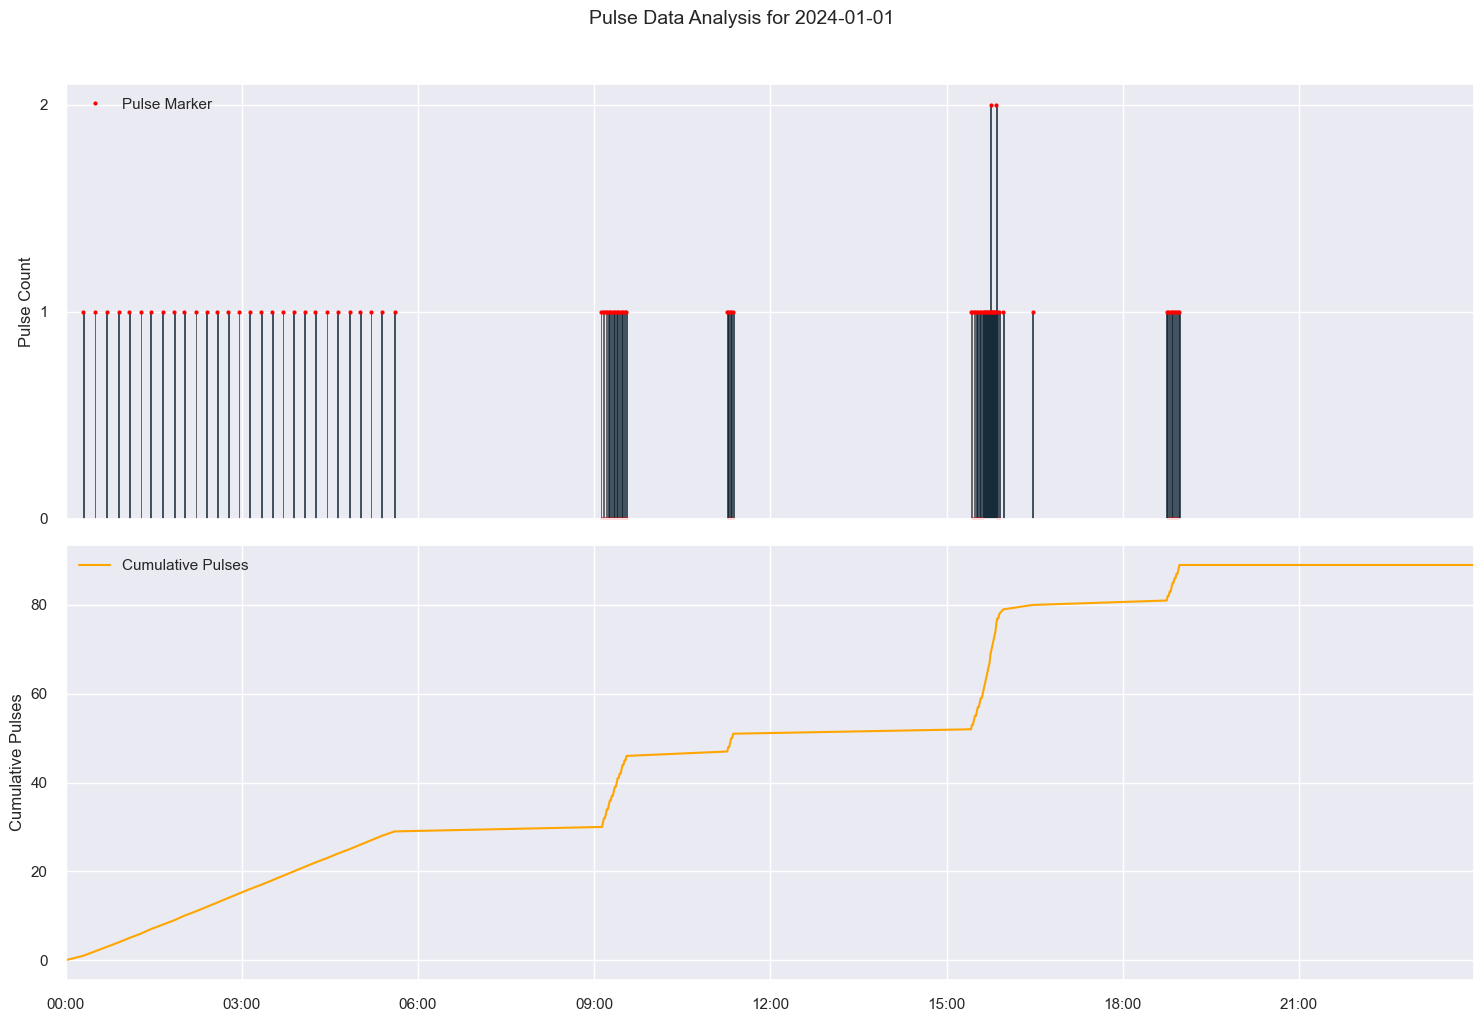


Daily Statistics:
Total number of pulses: 89.0
Time range: 2024-01-01 00:00:00 to 2024-01-01 23:59:00
Number of readings: 111

Pulse frequency:
0.0    22
1.0    85
2.0     2
Name: pulse_count, dtype: int64


In [22]:
# Import required libraries
import pandas as pd
import json
from datetime import datetime, timedelta
import matplotlib.pyplot as plt
from matplotlib.ticker import MaxNLocator
import seaborn as sns

# Set plotting style
plt.style.use('seaborn-v0_8')
sns.set_theme()

def convert_pulse_to_timeseries(device_id, date_str, time_str, pulse_seq):
    """[previous docstring remains the same]"""
    try:
        dt = datetime.strptime(f"{date_str} {time_str}", "%y%m%d %H:%M")
        pulses = pulse_seq.strip('|').split('|')
        
        time_series = []
        for i, pulse in enumerate(pulses):
            time_series.append({
                'device_id': device_id,
                'timestamp': dt + timedelta(minutes=i),
                'pulse_count': int(pulse)
            })
        
        return pd.DataFrame(time_series)
    except Exception as e:
        print(f"Error processing sequence: {e}")
        return None

try:
    # Read the CSV file
    df = pd.read_csv('../data/processed/pulse_data_for_evaluation.csv')
    print(f"Loaded {len(df)} records")
    
    # Get first row for example
    sample_row = df.iloc[0]
    
    # Parse the JSON data
    data = json.loads(sample_row['data'])
    pulse_data = data['data']
    
    # Process all pulse records for the day
    all_pulses = []
    for pulse in pulse_data:
        ts_df = convert_pulse_to_timeseries(
            sample_row['device_id_encoded'],
            sample_row['date'],
            pulse['t'],
            pulse['d']
        )
        if ts_df is not None:
            all_pulses.append(ts_df)
    
    # Combine all pulse records
    daily_pulses = pd.concat(all_pulses, ignore_index=True)
    daily_pulses = daily_pulses.sort_values('timestamp')

    # Print the first 10 rows of the daily_pulses DataFrame 
    print(f"First 10 rows of daily_pulses DataFrame:")
    print(daily_pulses.head(10))    
    
    # Calculate cumulative sum of pulses
    daily_pulses['cumulative_pulses'] = daily_pulses['pulse_count'].cumsum()
    
    # Ensure the DataFrame includes 00:00 and 23:59
    start_of_day = daily_pulses['timestamp'].min().replace(hour=0, minute=0, second=0, microsecond=0)
    end_of_day = daily_pulses['timestamp'].min().replace(hour=23, minute=59, second=0, microsecond=0)

    # Add rows for start and end of the day
    extra_rows = []
    if daily_pulses['timestamp'].min() > start_of_day:
        extra_rows.append({'timestamp': start_of_day, 'cumulative_pulses': 0})
    if daily_pulses['timestamp'].max() < end_of_day:
        extra_rows.append({'timestamp': end_of_day, 'cumulative_pulses': daily_pulses['cumulative_pulses'].iloc[-1]})

    # Append and re-sort the DataFrame
    if extra_rows:
        daily_pulses = pd.concat([daily_pulses, pd.DataFrame(extra_rows)], ignore_index=True).sort_values('timestamp')

    # Create subplots for both instant and cumulative pulses with a shared x-axis
    fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(15, 10), sharex=True)
    
    # Adjust the bar plot for ax1
    ax1.bar(daily_pulses['timestamp'], 
            daily_pulses['pulse_count'], 
            width=timedelta(minutes=0.8),  # Slightly narrower bars for clarity
            alpha=0.8,  # Reduced opacity for better contrast
            color='#1f77b4',  # Use a color-blind-friendly blue
            edgecolor='black',  # Add black edges for distinction
            linewidth=0.5)  # Thin edge lines for subtle emphasis

    # Add markers to show pulse counts more distinctly
    ax1.plot(daily_pulses['timestamp'], 
             daily_pulses['pulse_count'], 
             marker='o', 
             markersize=3, 
             linestyle='', 
             color='red', 
             label='Pulse Marker')

    # Add a legend to ax1
    ax1.legend(loc='upper left')
    ax1.set_ylabel("Pulse Count")

    # Set y-axis ticks to integers
    ax1.yaxis.set_major_locator(MaxNLocator(integer=True))

    # Plot cumulative pulses as a line plot on ax2
    ax2.plot(daily_pulses['timestamp'], 
             daily_pulses['cumulative_pulses'], 
             color='orange', 
             label='Cumulative Pulses')

    # Set x-axis limits to cover the entire day
    ax2.set_xlim([start_of_day, end_of_day])

    # Add a legend to ax2
    ax2.legend(loc='upper left')
    ax2.set_ylabel("Cumulative Pulses")

    # Format x-axis to show hours and limit to [00:00, 23:59]
    ax2.xaxis.set_major_formatter(plt.matplotlib.dates.DateFormatter('%H:%M'))

    # Add date to the main title
    fig.suptitle(f"Pulse Data Analysis for {daily_pulses['timestamp'].min().strftime('%Y-%m-%d')}", 
                 y=1.02, fontsize=14)

    # Adjust layout
    plt.tight_layout()
    plt.show()

    # Print summary statistics
    print("\nDaily Statistics:")
    print(f"Total number of pulses: {daily_pulses['pulse_count'].sum()}")
    print(f"Time range: {daily_pulses['timestamp'].min()} to {daily_pulses['timestamp'].max()}")
    print(f"Number of readings: {len(daily_pulses)}")
    print("\nPulse frequency:")
    print(daily_pulses['pulse_count'].value_counts().sort_index())

except Exception as e:
    print(f"Error in data processing: {e}")